In [1]:
import pandas as pd
import numpy as np

# Load the provided CSV files
wd = '/Users/neilgrigg/Desktop/citadelEQR/'

df_sizing_data = pd.read_csv(wd+'/data/SizingData.csv')

# Displaying the first few rows of each DataFrame to confirm successful loading
df_sizing_data


,Symbol,GICS INDUSTRY NAME,MarketCap $B,P/E Ratio,1Yr Trailing Sales Growth,Idiosycratic Volatility,Total Volatility,ADTV $B,Beta,Residual Return,Total Return,Positions $M
0,TECH1,"Technology Hardware, Storage &","2,917",28.74,7.8,0.16,0.22,11.35,1.1,0.15,0.21,50.0
1,FINA1,Financial Services,32,9.03,4.7,0.46,0.49,0.33,1.1,-0.06,-0.08,20.0
2,INTE1,Interactive Media & Services,2,12.41,65.4,0.32,0.42,0.04,1.0,-0.16,-0.18,-50.0
3,INTE2,Interactive Media & Services,708,18.02,-1.1,0.36,0.51,7.50,1.2,0.41,0.45,12.5
4,SOFT1,Software,11,24.32,19.4,0.44,0.64,0.22,2.0,-0.06,-0.08,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...
78,ITS6,IT Services,83,134.18,21.4,0.46,0.65,1.12,2.1,0.29,0.42,-2.5
79,SEMI9,Semiconductors & Semiconductor,297,35.96,13.8,0.25,0.32,0.73,1.6,0.18,0.20,2.5
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00,34.00,NaN


In [2]:
# Calculate gross_exposure_$M by summing the absolute values of the "Positions $M" column
gmv_pct = df_sizing_data['Positions $M'].abs().sum()

# Calculate position size as a % of gross_exposure and add it as a new column
df_sizing_data['gmv%'] = (df_sizing_data['Positions $M'] / gmv_pct)

df_sizing_data.head()


,Symbol,GICS INDUSTRY NAME,MarketCap $B,P/E Ratio,1Yr Trailing Sales Growth,Idiosycratic Volatility,Total Volatility,ADTV $B,Beta,Residual Return,Total Return,Positions $M,gmv%
0,TECH1,"Technology Hardware, Storage &","2,917",28.74,7.8,0.16,0.22,11.35,1.1,0.15,0.21,50.0,0.0500
1,FINA1,Financial Services,32,9.03,4.7,0.46,0.49,0.33,1.1,-0.06,-0.08,20.0,0.0200
2,INTE1,Interactive Media & Services,2,12.41,65.4,0.32,0.42,0.04,1.0,-0.16,-0.18,-50.0,-0.0500
3,INTE2,Interactive Media & Services,708,18.02,-1.1,0.36,0.51,7.50,1.2,0.41,0.45,12.5,0.0125
4,SOFT1,Software,11,24.32,19.4,0.44,0.64,0.22,2.0,-0.06,-0.08,12.5,0.0125


In [3]:
def calculate_portfolio_profitability_and_add_column(df):
    """
    Calculate the overall profitability of the portfolio in terms of idiosyncratic returns and
    add the idiosyncratic PnL as a column.

    :param df: DataFrame containing portfolio data with 'Positions $M' and 'Residual Return' columns.
    :return: Updated DataFrame with idiosyncratic PnL column and overall profitability as a percentage.
    """
    # Ensure 'Residual Return' is a float
    df['Residual Return'] = df['Residual Return'].astype(float)
    
    # Calculate the residual dollar returns for each asset
    df['Alpha_$'] = df['Residual Return'] * abs(df['Positions $M'])

    # Calculate gross exposure
    gross_exposure_dollar_M = df['Positions $M'].abs().sum()

    # Calculate the sum of the idiosyncratic PnL
    total_alpha_pnl = df['Alpha_$'].sum()

    # Calculate profitability vs. gmv
    profitability_percentage = (total_alpha_pnl / gross_exposure_dollar_M)

    return df, profitability_percentage

# Apply the function
df_sizing_data, portfolio_profitability = calculate_portfolio_profitability_and_add_column(df_sizing_data)
print(portfolio_profitability)
df_sizing_data.head()


0.07322500000000001


,Symbol,GICS INDUSTRY NAME,MarketCap $B,P/E Ratio,1Yr Trailing Sales Growth,Idiosycratic Volatility,Total Volatility,ADTV $B,Beta,Residual Return,Total Return,Positions $M,gmv%,Alpha_$
0,TECH1,"Technology Hardware, Storage &","2,917",28.74,7.8,0.16,0.22,11.35,1.1,0.15,0.21,50.0,0.0500,7.500
1,FINA1,Financial Services,32,9.03,4.7,0.46,0.49,0.33,1.1,-0.06,-0.08,20.0,0.0200,-1.200
2,INTE1,Interactive Media & Services,2,12.41,65.4,0.32,0.42,0.04,1.0,-0.16,-0.18,-50.0,-0.0500,-8.000
3,INTE2,Interactive Media & Services,708,18.02,-1.1,0.36,0.51,7.50,1.2,0.41,0.45,12.5,0.0125,5.125
4,SOFT1,Software,11,24.32,19.4,0.44,0.64,0.22,2.0,-0.06,-0.08,12.5,0.0125,-0.750


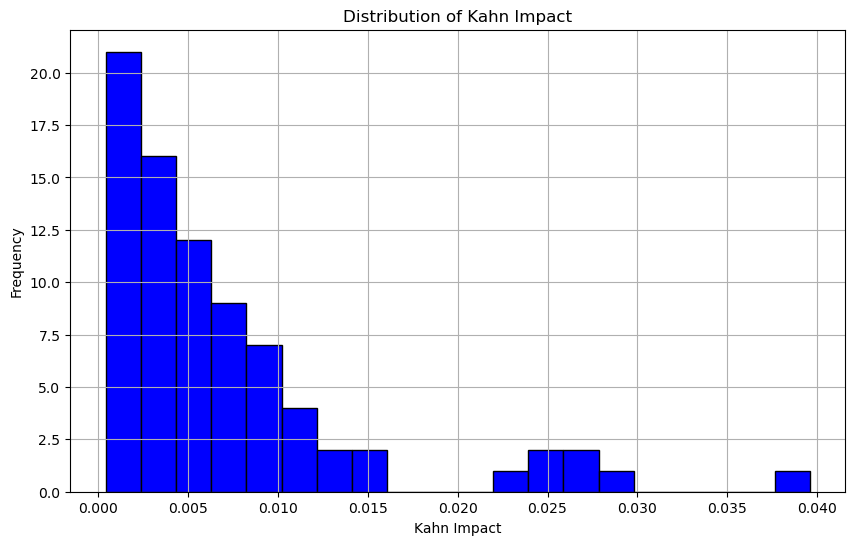

In [4]:
import numpy as np

def calculate_kahn_impact(df, business_days_per_year=252):
    # Convert annual volatility to daily volatility
    df['Daily Volatility'] = df['Total Volatility'] / np.sqrt(business_days_per_year)

    # Convert ADTV from billions to millions
    df['ADTV $M'] = df['ADTV $B'] * 1000

    # Absolute value of position size
    df['Absolute Position Size $M'] = df['Positions $M'].abs()

    # Calculate Kahn Impact
    df['Kahn Impact'] = df['Daily Volatility'] * np.sqrt(df['Absolute Position Size $M'] / df['ADTV $M'])

    return df

# Apply the function
df_sizing_data = calculate_kahn_impact(df_sizing_data)

import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sizing_data['Kahn Impact'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Kahn Impact')
plt.xlabel('Kahn Impact')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
# Filter positions where Kahn Impact is greater than 0.02
positions_with_high_kahn_impact = df_sizing_data[df_sizing_data['Kahn Impact'] > 0.02]

# Sort these positions by Kahn Impact
sorted_positions = positions_with_high_kahn_impact.sort_values(by='Kahn Impact', ascending=False)

# Output the positions with their Kahn Impact, Residual Return, Absolute Position Size, and Symbol
output_table = sorted_positions[['Symbol', 'Kahn Impact', 'Residual Return', 'Absolute Position Size $M','Alpha_$']]
print(output_table)


   Symbol  Kahn Impact  Residual Return  Absolute Position Size $M  Alpha_$
16  HEAL1     0.039605             0.21                       20.0    4.200
2   INTE1     0.029580            -0.16                       50.0   -8.000
23  SOFT5     0.026264             0.56                       20.0   11.200
70  MEDI5     0.026143            -0.19                        2.5   -0.475
18  HOTE2     0.025717            -0.05                       20.0   -1.000
19  INTE4     0.024054            -0.11                       20.0   -2.200
54  PROF3     0.023531            -0.18                        7.5   -1.350


In [6]:
def add_annual_dollar_idio_vol(df):
    """
    Add a column for annual dollar volatility to the DataFrame.

    :param df: DataFrame containing portfolio data with 'Positions $M' and 'Total Volatility' columns.
    :return: Updated DataFrame with annual dollar volatility column.
    """
    # Calculate the absolute value of position size
    df['Absolute Position Size $M'] = df['Positions $M'].abs()

    # Calculate annual dollar volatility
    df['Idio $ Vol'] = df['Idiosycratic Volatility'] * df['Absolute Position Size $M']

    return df

# Apply the function to df_sizing_data
df_sizing_data = add_annual_dollar_idio_vol(df_sizing_data)
df_sizing_data


,Symbol,GICS INDUSTRY NAME,MarketCap $B,P/E Ratio,1Yr Trailing Sales Growth,Idiosycratic Volatility,Total Volatility,ADTV $B,Beta,Residual Return,Total Return,Positions $M,gmv%,Alpha_$,Daily Volatility,ADTV $M,Absolute Position Size $M,Kahn Impact,Idio $ Vol
0,TECH1,"Technology Hardware, Storage &","2,917",28.74,7.8,0.16,0.22,11.35,1.1,0.15,0.21,50.0,0.0500,7.500,0.013859,11350.0,50.0,0.000920,8.000
1,FINA1,Financial Services,32,9.03,4.7,0.46,0.49,0.33,1.1,-0.06,-0.08,20.0,0.0200,-1.200,0.030867,330.0,20.0,0.007599,9.200
2,INTE1,Interactive Media & Services,2,12.41,65.4,0.32,0.42,0.04,1.0,-0.16,-0.18,-50.0,-0.0500,-8.000,0.026458,40.0,50.0,0.029580,16.000
3,INTE2,Interactive Media & Services,708,18.02,-1.1,0.36,0.51,7.50,1.2,0.41,0.45,12.5,0.0125,5.125,0.032127,7500.0,12.5,0.001312,4.500
4,SOFT1,Software,11,24.32,19.4,0.44,0.64,0.22,2.0,-0.06,-0.08,12.5,0.0125,-0.750,0.040316,220.0,12.5,0.009610,5.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,ITS6,IT Services,83,134.18,21.4,0.46,0.65,1.12,2.1,0.29,0.42,-2.5,-0.0025,0.725,0.040946,1120.0,2.5,0.001935,1.150
79,SEMI9,Semiconductors & Semiconductor,297,35.96,13.8,0.25,0.32,0.73,1.6,0.18,0.20,2.5,0.0025,0.450,0.020158,730.0,2.5,0.001180,0.625
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Assuming 'df_sizing_data' is your DataFrame
df_sizing_data['Idiosyncratic Variance'] = df_sizing_data['Idiosycratic Volatility'] ** 2
df_sizing_data['Total Variance'] = df_sizing_data['Total Volatility'] ** 2
df_sizing_data

,Symbol,GICS INDUSTRY NAME,MarketCap $B,P/E Ratio,1Yr Trailing Sales Growth,Idiosycratic Volatility,Total Volatility,ADTV $B,Beta,Residual Return,...,Positions $M,gmv%,Alpha_$,Daily Volatility,ADTV $M,Absolute Position Size $M,Kahn Impact,Idio $ Vol,Idiosyncratic Variance,Total Variance
0,TECH1,"Technology Hardware, Storage &","2,917",28.74,7.8,0.16,0.22,11.35,1.1,0.15,...,50.0,0.0500,7.500,0.013859,11350.0,50.0,0.000920,8.000,0.0256,0.0484
1,FINA1,Financial Services,32,9.03,4.7,0.46,0.49,0.33,1.1,-0.06,...,20.0,0.0200,-1.200,0.030867,330.0,20.0,0.007599,9.200,0.2116,0.2401
2,INTE1,Interactive Media & Services,2,12.41,65.4,0.32,0.42,0.04,1.0,-0.16,...,-50.0,-0.0500,-8.000,0.026458,40.0,50.0,0.029580,16.000,0.1024,0.1764
3,INTE2,Interactive Media & Services,708,18.02,-1.1,0.36,0.51,7.50,1.2,0.41,...,12.5,0.0125,5.125,0.032127,7500.0,12.5,0.001312,4.500,0.1296,0.2601
4,SOFT1,Software,11,24.32,19.4,0.44,0.64,0.22,2.0,-0.06,...,12.5,0.0125,-0.750,0.040316,220.0,12.5,0.009610,5.500,0.1936,0.4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,ITS6,IT Services,83,134.18,21.4,0.46,0.65,1.12,2.1,0.29,...,-2.5,-0.0025,0.725,0.040946,1120.0,2.5,0.001935,1.150,0.2116,0.4225
79,SEMI9,Semiconductors & Semiconductor,297,35.96,13.8,0.25,0.32,0.73,1.6,0.18,...,2.5,0.0025,0.450,0.020158,730.0,2.5,0.001180,0.625,0.0625,0.1024
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Table for GICS Industry
industry_table = df_sizing_data.groupby('GICS INDUSTRY NAME').agg(
    n=('GICS INDUSTRY NAME', 'size'),
    Sum_Position_Size=('Absolute Position Size $M', 'sum'),
    Total_Alpha_Dollars=('Alpha_$', 'sum')
)

# Add total sums at the bottom of each table
industry_table.loc['Total'] = industry_table.sum()

# Sort the industry group by position size
industry_table = industry_table.sort_values(by='Sum_Position_Size', ascending=False)

# Print the tables
print("\nIndustry Table:\n", industry_table)


Industry Table:
                                    n  Sum_Position_Size  Total_Alpha_Dollars
GICS INDUSTRY NAME                                                          
Total                           80.0             1000.0               73.225
Software                        12.0              140.0               21.925
Hotels, Restaurants & Leisure   10.0              117.5                4.800
Interactive Media & Services     5.0               92.5               -3.775
Entertainment                    5.0               92.5               18.700
Semiconductors & Semiconductor   9.0               87.5                1.525
Technology Hardware, Storage &   3.0               70.0                9.075
Financial Services               5.0               62.5               -1.475
IT Services                      6.0               60.0               -0.150
Media                            5.0               57.5               -0.425
Automobiles                      1.0               50.0   

In [9]:
# Assuming 'df_sizing_data' is the DataFrame with the necessary data
# Grouping data by industry and calculating total position size and total alpha dollars
industry_groups = df_sizing_data.groupby('GICS INDUSTRY NAME').agg(
    Total_Position_Size_M=('Absolute Position Size $M', 'sum'),
    Count_Stocks=('Symbol', 'count'),
    Total_Position_Alpha_Dollars=('Alpha_$', 'sum')
)

# Define bins and labels for categorizing industries
bins = [0, 40, 80, 120, 160]
labels = ['Very Low', 'Low', 'Medium', 'High']

# Categorize industries into bins based on their total position size
industry_groups['Intensity of Industry Focus'] = pd.cut(
    industry_groups['Total_Position_Size_M'],
    bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# Grouping by intensity to get count of industries, count of stocks, sum of total position size, sum of total position alpha
intensity_summary = industry_groups.groupby('Intensity of Industry Focus').agg(
    Count_Industries=('Total_Position_Size_M', 'count'),
    Count_Stocks=('Count_Stocks', 'sum'),
    Sum_Total_Position_Size=('Total_Position_Size_M', 'sum'),
    Sum_Total_Position_Alpha_Dollars=('Total_Position_Alpha_Dollars', 'sum')
)

# Rounding the dollar figures to the nearest whole $M
intensity_summary[['Sum_Total_Position_Size', 'Sum_Total_Position_Alpha_Dollars']] = intensity_summary[['Sum_Total_Position_Size', 'Sum_Total_Position_Alpha_Dollars']].round()

# Resetting index for better readability
intensity_summary.reset_index()


/var/folders/9r/bgtf80qx2ds2vnth7hy05yhh0000gn/T/ipykernel_92468/230440890.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intensity_summary = industry_groups.groupby('Intensity of Industry Focus').agg(


,Intensity of Industry Focus,Count_Industries,Count_Stocks,Sum_Total_Position_Size,Sum_Total_Position_Alpha_Dollars
0,Very Low,10,19,170.0,4.0
1,Low,5,20,300.0,27.0
2,Medium,4,29,390.0,21.0
3,High,1,12,140.0,22.0


In [10]:
sorted_industry_groups = industry_groups.sort_values(by='Total_Position_Size_M', ascending=False)
sorted_industry_groups

,Total_Position_Size_M,Count_Stocks,Total_Position_Alpha_Dollars,Intensity of Industry Focus
GICS INDUSTRY NAME,,,,
Software,140.0,12,21.925,High
"Hotels, Restaurants & Leisure",117.5,10,4.800,Medium
Entertainment,92.5,5,18.700,Medium
Interactive Media & Services,92.5,5,-3.775,Medium
Semiconductors & Semiconductor,87.5,9,1.525,Medium
"Technology Hardware, Storage &",70.0,3,9.075,Low
Financial Services,62.5,5,-1.475,Low
IT Services,60.0,6,-0.150,Low
Media,57.5,5,-0.425,Low


In [11]:
# Calculate the total sum of 'Absolute Position Size $M'
total_position_size = df_sizing_data['Absolute Position Size $M'].sum()

# Calculate '% GMV' for each row
df_sizing_data['% GMV'] = (df_sizing_data['Absolute Position Size $M'] / total_position_size) * 100

# Display the updated DataFrame
print(df_sizing_data.head())


  Symbol              GICS INDUSTRY NAME MarketCap $B  P/E Ratio  \
0  TECH1  Technology Hardware, Storage &        2,917      28.74   
1  FINA1              Financial Services           32       9.03   
2  INTE1    Interactive Media & Services            2      12.41   
3  INTE2    Interactive Media & Services          708      18.02   
4  SOFT1                        Software           11      24.32   

   1Yr Trailing Sales Growth  Idiosycratic Volatility  Total Volatility  \
0                        7.8                     0.16              0.22   
1                        4.7                     0.46              0.49   
2                       65.4                     0.32              0.42   
3                       -1.1                     0.36              0.51   
4                       19.4                     0.44              0.64   

   ADTV $B  Beta  Residual Return  ...    gmv%  Alpha_$  Daily Volatility  \
0    11.35   1.1             0.15  ...  0.0500    7.500        

In [14]:
# Sort df_sizing_data by 'Absolute Position Size $M' to create df_sizing_data_sorted
df_sizing_data_sorted = df_sizing_data.sort_values(by='Absolute Position Size $M')

# Define the bins and labels for the 'Absolute Position Size $M'
bins = [0, 10, 20, 30, 40, float('inf')]  # Setting the last bin to infinity to include all larger values
labels = ['$0-10M', '$10-20M', '$20-30M', '$30-40M', '$40+M']

# Assign each stock to a bin based on its 'Absolute Position Size $M'
df_sizing_data_sorted['Relative Conviction'] = pd.cut(df_sizing_data_sorted['Absolute Position Size $M'], bins=bins, labels=labels)

# Initialize an empty DataFrame to store the results
group_analysis_conviction = pd.DataFrame()

for label in labels:
    # Selecting stocks in the current group
    group_data = df_sizing_data_sorted[df_sizing_data_sorted['Relative Conviction'] == label].copy()

for label in labels:
    # Selecting stocks in the current group
    group_data = df_sizing_data_sorted[df_sizing_data_sorted['Relative Conviction'] == label].copy()

    # Number of stocks in the group
    num_stocks = group_data.shape[0]

    # Total absolute position size in the group
    total_position_size = group_data['Absolute Position Size $M'].sum()

    # Total position alpha in the group
    total_position_alpha = group_data['Alpha_$'].sum()

    # Calculate weighted average residual return, handling division by zero or NaN
    avg_residual_return = total_position_alpha / total_position_size if total_position_size > 0 else np.nan

    # Create a new row with group metrics, handling NaN values
    new_row = pd.DataFrame({
        'Relative Conviction': [label],
        'Number of Stocks': [num_stocks],
        'Total Position Size $M': [int(total_position_size)],
        'Total Position Alpha $': [int(total_position_alpha)],
        'Average Residual Return': [round(avg_residual_return, 2) if not np.isnan(avg_residual_return) else '-'],
    })
    group_analysis_conviction = pd.concat([group_analysis_conviction, new_row], ignore_index=True)

# Calculate and add the sum row for the relevant columns
sum_row_conviction = {
    'Relative Conviction': 'Total',
    'Number of Stocks': group_analysis_conviction['Number of Stocks'].sum(),
    'Total Position Size $M': int(group_analysis_conviction['Total Position Size $M'].sum()),
    'Total Position Alpha $': int(group_analysis_conviction['Total Position Alpha $'].sum()),
    'Average Residual Return': '-',
}
group_analysis_conviction = pd.concat([group_analysis_conviction, pd.DataFrame([sum_row_conviction])], ignore_index=True)

# Display the results
print(group_analysis_conviction)

  Relative Conviction  Number of Stocks  Total Position Size $M  \
0              $0-10M                40                     215   
1             $10-20M                36                     585   
2             $20-30M                 0                       0   
3             $30-40M                 0                       0   
4               $40+M                 4                     200   
5               Total                80                    1000   

   Total Position Alpha $ Average Residual Return  
0                      13                    0.06  
1                      22                    0.04  
2                       0                       -  
3                       0                       -  
4                      36                    0.18  
5                      71                       -  


In [16]:
# First, let's create a function to calculate the rightwayness metrics for each conviction group
import pandas as pd
import numpy as np

def calculate_rightwayness_metrics(group_data):
    """
    Calculate rightwayness metrics for a given group of data.

    :param group_data: DataFrame containing a subset of portfolio data.
    :return: Dictionary of rightwayness metrics.
    """
    # Check if the signs of 'Positions $M' and 'Residual Return' match
    group_data['rightway'] = np.sign(group_data['Residual Return']) > 0

    # Count the number of rightway positions
    rightway_count = group_data['rightway'].sum()

    # Total number of positions
    total_positions = len(group_data)

    # Perform a binomial test
    percent_rightway = rightway_count / total_positions if total_positions else 0

    return {
        'k': rightway_count,
        'n': total_positions,
        'percent_rightway': percent_rightway,
    }

# Re-initializing the DataFrame
rightwayness_by_conviction = pd.DataFrame()

for label in labels:
    group_data = df_sizing_data_sorted[df_sizing_data_sorted['Relative Conviction'] == label].copy()
    rightwayness_metrics = calculate_rightwayness_metrics(group_data)

    new_row = {
        'Relative Conviction': label,
        'Percent Rightwayness': round(rightwayness_metrics['percent_rightway'] * 100, 2),
        'k (Rightway Count)': rightwayness_metrics['k'],
        'n (Total Positions)': rightwayness_metrics['n'],
    }

    # Using concat instead of append
    rightwayness_by_conviction = pd.concat([rightwayness_by_conviction, pd.DataFrame([new_row])], ignore_index=True)

rightwayness_by_conviction



,Relative Conviction,Percent Rightwayness,k (Rightway Count),n (Total Positions)
0,$0-10M,60.0,24,40
1,$10-20M,50.0,18,36
2,$20-30M,0.0,0,0
3,$30-40M,0.0,0,0
4,$40+M,75.0,3,4
